In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

**Merge file for each month**

In [2]:
path = './Sales_Data'
files = [file for file in os.listdir(path) if not file.startswith('.')]

all_months_data = pd.DataFrame()

for file in files:
    current_data = pd.read_csv(path+"/"+file)
    all_months_data = pd.concat([all_months_data, current_data])
    
all_months_data.to_csv("all_data_copy.csv", index=False)

**Opening up file**

In [3]:
all_data = pd.read_csv('all_data_copy.csv')
all_data.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


**Data Cleaning**

In [4]:
all_data.isna().any()

Order ID            True
Product             True
Quantity Ordered    True
Price Each          True
Order Date          True
Purchase Address    True
dtype: bool

In [5]:
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [6]:
all_data = all_data.dropna(how='all')
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [7]:
18850/186305*100

10.117817557231422

In [8]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186305 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 9.9+ MB


**Order date to date time**

In [9]:
#since there are date that is not a proper date, lets drop them
all_data[all_data['Order Date'].str[0:2]=='Or']

all_data = all_data[all_data['Order Date'].str[0:2]!='Or']

**Convert columns to correct type**

In [10]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


**We need to reset index since some of the rows were thrown away**

In [11]:
all_data = all_data.reset_index()

In [12]:
all_data.head()

,index,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
2,3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [13]:
all_data = all_data.drop(['index'],axis=1)

**Make Columns correct type**

In [14]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])

In [15]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185950 entries, 0 to 185949
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          185950 non-null  object 
 1   Product           185950 non-null  object 
 2   Quantity Ordered  185950 non-null  int64  
 3   Price Each        185950 non-null  float64
 4   Order Date        185950 non-null  object 
 5   Purchase Address  185950 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 8.5+ MB


### Augment the Data

**adding month column**

In [16]:
import datetime

all_data['Order Date'] = pd.to_datetime(all_data['Order Date'], format='%m/%d/%y %H:%M')

In [17]:
all_data['month'] = pd.to_datetime(all_data['Order Date']).dt.month

**City Column**

In [18]:
def get_city(address):
    return address.split(',')[1].strip(" ")
    
def get_state(address):
    return address.split(',')[2].strip(" ")[1]

all_data['City'] = all_data['Purchase Address'].apply(lambda x: f"{get_city(x)}  ({get_state(x)})")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,Dallas (X)
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,Boston (A)
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (A)
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (A)
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,Los Angeles (A)


### Data Exploration

**General Questions**
- What is our customer base
- what product are we selling
- Overall trend?

Analysis
- Product that we sold the most in quantity is AAA Batteries while LG Dryer is the least
- It seems like the general product that we are selling is electronics
- Macbook Pro Laptop generate the most income

In [19]:
all_data.groupby('Product')['Quantity Ordered'].sum().sort_values(ascending=False)

Product
AAA Batteries (4-pack)        31017
AA Batteries (4-pack)         27635
USB-C Charging Cable          23975
Lightning Charging Cable      23217
Wired Headphones              20557
Apple Airpods Headphones      15661
Bose SoundSport Headphones    13457
27in FHD Monitor               7550
iPhone                         6849
27in 4K Gaming Monitor         6244
34in Ultrawide Monitor         6199
Google Phone                   5532
Flatscreen TV                  4819
Macbook Pro Laptop             4728
ThinkPad Laptop                4130
20in Monitor                   4129
Vareebadd Phone                2068
LG Washing Machine              666
LG Dryer                        646
Name: Quantity Ordered, dtype: int64

In [22]:
all_data['Sales'] = all_data['Quantity Ordered'].astype('int') * all_data['Price Each'].astype('float')
all_data.groupby(['Product']).sum()['Sales'].sort_values(ascending=False)

Product
Macbook Pro Laptop            8037600.00
iPhone                        4794300.00
ThinkPad Laptop               4129958.70
Google Phone                  3319200.00
27in 4K Gaming Monitor        2435097.56
34in Ultrawide Monitor        2355558.01
Apple Airpods Headphones      2349150.00
Flatscreen TV                 1445700.00
Bose SoundSport Headphones    1345565.43
27in FHD Monitor              1132424.50
Vareebadd Phone                827200.00
20in Monitor                   454148.71
LG Washing Machine             399600.00
LG Dryer                       387600.00
Lightning Charging Cable       347094.15
USB-C Charging Cable           286501.25
Wired Headphones               246478.43
AA Batteries (4-pack)          106118.40
AAA Batteries (4-pack)          92740.83
Name: Sales, dtype: float64

In [23]:
all_data.groupby('Product')['Price Each'].first().sort_values(ascending=False)

Product
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
iPhone                         700.00
LG Dryer                       600.00
LG Washing Machine             600.00
Google Phone                   600.00
Vareebadd Phone                400.00
27in 4K Gaming Monitor         389.99
34in Ultrawide Monitor         379.99
Flatscreen TV                  300.00
Apple Airpods Headphones       150.00
27in FHD Monitor               149.99
20in Monitor                   109.99
Bose SoundSport Headphones      99.99
Lightning Charging Cable        14.95
Wired Headphones                11.99
USB-C Charging Cable            11.95
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Name: Price Each, dtype: float64

**Revenue by day/week/month**

# monthly
Analysis
- it seems like people buy the most during end of year while the least is on january(1) and septermber(9). this might be due to the festive season(christmas) and might also due to festive discounts offered.
- the disparity between month 12 and 1 is very sharp and this might be due to the fact that customers are fatigued as we just got through the festive time


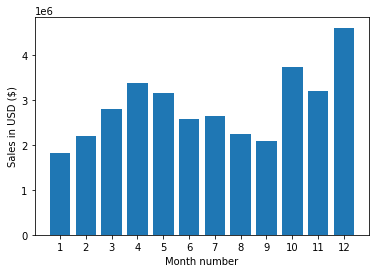

In [24]:
#by month
data = all_data.groupby(['month']).sum()['Sales']
months = range(1,13)

plt.bar(months,data)
plt.xticks(months)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month number')
plt.show()

# daily

Analysis
- its is quite consistent thoughout the week as there is not much difference


In [25]:
weekDays = ("Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday")

day_list = []
for item in all_data['Order Date']:
    day_list.append(item.weekday())
all_data['day_of_week'] = day_list

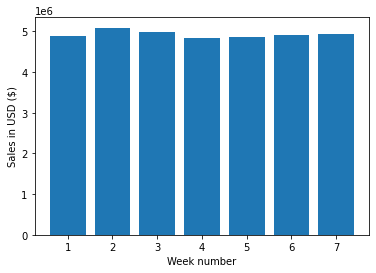

In [26]:
#by month
data = all_data.groupby(['day_of_week']).sum()['Sales']
days = range(1,8)

plt.bar(days,data)
plt.xticks(days)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Week number')
plt.show()

**Revenue by SKU?**
- SKU as in stock keeping unit, we should check around the numbers

**Discounts and promotions. Returns by day/week/month. Percent returns by SKU by time.**

**AOV**
- Average order value (AOV) tracks the average dollar amount spent each time a customer places an order on a website or mobile app.
- we may also compare AOV to discount per order, using clustering

In [28]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,City,Sales,day_of_week
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,Dallas (X),23.90,4
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,Boston (A),99.99,6
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (A),600.00,4
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (A),11.99,4
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,Los Angeles (A),11.99,1


**What time should we advertise to increase likeliness customer buying the product**

Analysis
- since customers are buying the most starting at 11am, we should promote during that time or also before 7pm

In [29]:
all_data['Hour'] = pd.to_datetime(all_data['Order Date']).dt.hour
all_data['Count'] = 1
all_data.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,City,Sales,day_of_week,Hour,Count
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,Dallas (X),23.90,4,8,1
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,Boston (A),99.99,6,22,1
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (A),600.00,4,14,1
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (A),11.99,4,14,1
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,Los Angeles (A),11.99,1,9,1


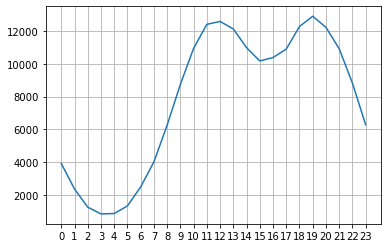

In [30]:
keys = [pair for pair, df in all_data.groupby(['Hour'])]

plt.plot(keys, all_data.groupby(['Hour']).count()['Count'])
plt.xticks(keys)
plt.grid()
plt.show()

### Advanced Data Exploration

**Seasonal Changes and temperature**

**Which products are often sold in pairs(product affinity/ market basket)**
- we can also use ARULES for this

Analysis
- iphone and lighting charging cable are the pair that is being sold the most

In [32]:
#first we return only duplicated order id and we reset index
df = all_data[all_data['Order ID'].duplicated(keep=False)].reset_index()

#then we create a new column listing down the item in the group
df['grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df = df.drop('index',axis=1)

#then we drop duplicates since we only need the unique grouping as each grouping
#is repeated twice
df2 = df[['Order ID', 'grouped']].drop_duplicates()

In [64]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in df2['grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))
    
for key,value in count.most_common(10):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


**Products that are sold the most**

Analysis
- AAA Batteries seemed to be selling the most
- and based on the overlayed plot, it is obvious there is negative correlation between Quantity Sold(Ordered) with the price

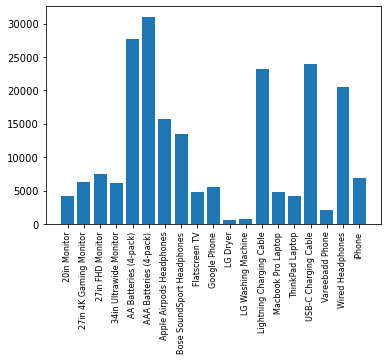

In [93]:
product_group = all_data.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']

keys = [pair for pair, df in product_group]
plt.bar(keys, quantity_ordered)
plt.xticks(keys, rotation='vertical', size=8)
plt.show()

<ipython-input-94-47066c2f195f>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(keys, rotation='vertical', size=8)
<ipython-input-94-47066c2f195f>:14: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


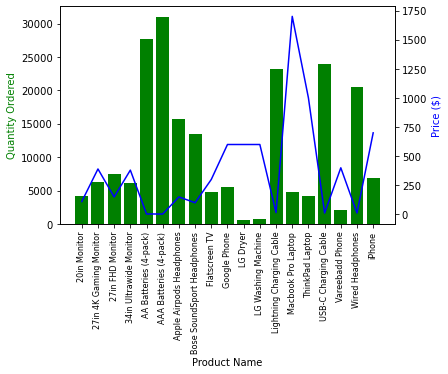

In [94]:
prices = all_data.groupby('Product').mean()['Price Each']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(keys, quantity_ordered, color='g')
ax2.plot(keys, prices, color='b')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')
ax1.set_xticklabels(keys, rotation='vertical', size=8)

fig.show()

**Repeat Customer Rate**
- how many customers are repeating
- products that they bought
- duration between purchases
- 20% of revenue should be coming from repeat purchases

**Cohort Analysis**
- eg; if customer bought oranges on first buy, are they more likely to buy x
- eg; if customer bought during raya promotion, are they likely to buy during y

**Revenue by City**
- which city sold the least and most and which overperform/ underperform
- check if there is urban and rural divide of items. data relating to geography and how it might determine customer's buying decision

Analysis
- Atlanta is most performing city about 8 times more than Seattle which is the least which is more than double the mean of sales of all cities
- while NYC has the highest population, the company werent able to make as much sales in that region as compared to San Francisco with least population but highest Sales

In [44]:
all_data.groupby(['City']).sum()

,Quantity Ordered,Price Each,month,Sales
City,,,,
Atlanta (A),16602,2.779908e+06,104794,2.795499e+06
Austin (X),11153,1.809874e+06,69829,1.819582e+06
Boston (A),22528,3.637410e+06,141112,3.661642e+06
Dallas (X),16730,2.752628e+06,104620,2.767975e+06
Los Angeles (A),33289,5.421435e+06,208325,5.452571e+06
New York City (Y),27932,4.635371e+06,175741,4.664317e+06
Portland (E),2750,4.471893e+05,17144,4.497583e+05
Portland (R),11303,1.860558e+06,70621,1.870732e+06
San Francisco (A),50239,8.211462e+06,315520,8.262204e+06


In [74]:
#to compare how much the average money per person by states that we manage to bring out
population_list = []

for item in all_data['City']:
    if item == 'Dallas  (X)':
        population_list.append(int(1331000))
    elif item == 'Boston  (A)':
        population_list.append(int(684379))
    elif item == 'Los Angeles  (A)':
        population_list.append(int(3967000))
    elif item == 'San Francisco  (A)':
        population_list.append(int(874961))
    elif item == 'Seattle  (A)':
        population_list.append(int(724305))
    elif item == 'Atlanta  (A)':
        population_list.append(int(488800))
    elif item == 'New York City  (Y)':
        population_list.append(int(8419000))
    elif item == 'Portland  (R)':
        population_list.append(int(645291))
    elif item == 'Austin  (X)':
        population_list.append(int(950807))
    elif item == 'Portland  (E)':
        population_list.append(int(645291))
    else:
        population_list.append(np.nan)
        
all_data['population'] = population_list

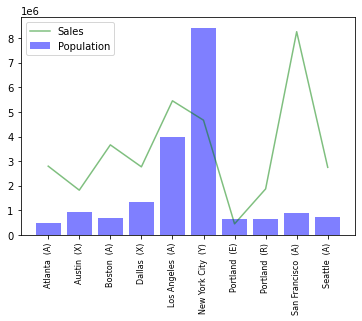

In [152]:
#defining the data
sales = all_data.groupby(['City']).sum()['Sales']
population = all_data.groupby(['City']).mean()['population']

#defining the x axis
keys = [item for item,df in all_data.groupby(['City'])]

#defining the plot
plt.plot(keys, sales, color='g',alpha=0.5, label = 'Sales')
plt.bar(keys, population, color='b',alpha=0.5,label = 'Population')


plt.xticks(keys, rotation='vertical', size=8)

plt.legend()
plt.show()

Average Sales per Person of different States

In [164]:
avg_sales.sort_values(ascending=False)

City
San Francisco  (A)    9.442940
Atlanta  (A)          5.719105
Boston  (A)           5.350313
Seattle  (A)          3.793644
Portland  (R)         2.899052
Dallas  (X)           2.079621
Austin  (X)           1.913724
Los Angeles  (A)      1.374482
Portland  (E)         0.696985
New York City  (Y)    0.554023
dtype: float64

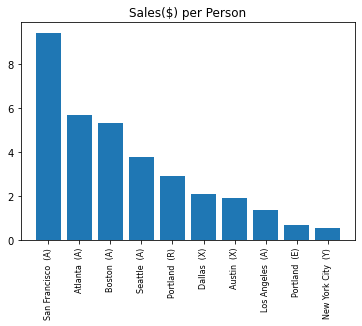

In [168]:
avg_sales = (sales/population).sort_values(ascending=False)
keys = [item for item in avg_sales.index]

plt.bar(keys,avg_sales,label='Sales')
plt.xticks(keys, rotation='vertical', size=8)

plt.title('Sales($) per Person')
plt.show()

**Narrowing Things Down**

Since it is a lot more obvious now, that San Francisco (SF) has the highest sales per person. Let's look into their product buying pattern.
- sales in SF are about 24% compared to other states
- LG Washing Machine has a slightly higher demand in SF at 27% of overall as compared to other products

In [183]:
all_data['City'].value_counts().apply(lambda x: round(100* x/len(all_data),2))

San Francisco  (A)    24.06
Los Angeles  (A)      15.92
New York City  (Y)    13.38
Boston  (A)           10.72
Atlanta  (A)           8.00
Dallas  (X)            7.97
Seattle  (A)           7.92
Portland  (R)          5.38
Austin  (X)            5.33
Portland  (E)          1.32
Name: City, dtype: float64

In [ ]:
avg_sales = all_data['Product']
keys = [item for item in avg_sales.index]

plt.bar(keys,avg_sales,label='Sales')
plt.xticks(keys, rotation='vertical', size=8)

plt.title('Sales($) per Person')
plt.show()

In [202]:
sf_data = all_data[all_data['City']== "San Francisco  (A)"]

In [210]:
(round(sf_data['Product'].value_counts() / all_data['Product'].value_counts(),3)*100).sort_values(ascending=False)

LG Washing Machine            27.0
Bose SoundSport Headphones    24.7
Google Phone                  24.5
USB-C Charging Cable          24.5
Wired Headphones              24.3
iPhone                        24.3
20in Monitor                  24.2
Macbook Pro Laptop            24.0
27in FHD Monitor              24.0
Lightning Charging Cable      23.9
Flatscreen TV                 23.9
Vareebadd Phone               23.9
AAA Batteries (4-pack)        23.9
Apple Airpods Headphones      23.8
AA Batteries (4-pack)         23.8
27in 4K Gaming Monitor        23.4
ThinkPad Laptop               23.3
34in Ultrawide Monitor        23.3
LG Dryer                      22.1
Name: Product, dtype: float64

**Product Basket in SF**

Analysis:
- the purchasing basket is quite similar to the overall data with slight difference in ranking such as (iphone, apple airpods headphones).

In [211]:
#first we return only duplicated order id and we reset index
df = sf_data[sf_data['Order ID'].duplicated(keep=False)].reset_index()

#then we create a new column listing down the item in the group
df['grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df = df.drop('index',axis=1)

#then we drop duplicates since we only need the unique grouping as each grouping
#is repeated twice
df2 = df[['Order ID', 'grouped']].drop_duplicates()



from itertools import combinations
from collections import Counter

count = Counter()

for row in df2['grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))
    
for key,value in count.most_common(10):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 251
('Google Phone', 'USB-C Charging Cable') 240
('iPhone', 'Wired Headphones') 116
('iPhone', 'Apple Airpods Headphones') 95
('Google Phone', 'Wired Headphones') 91
('Vareebadd Phone', 'USB-C Charging Cable') 89
('Google Phone', 'Bose SoundSport Headphones') 51
('USB-C Charging Cable', 'Wired Headphones') 48
('Vareebadd Phone', 'Wired Headphones') 40
('Lightning Charging Cable', 'Wired Headphones') 27


('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 9

**Extra**
- recommendation engine
- forecasting, prediction model to expect the next 3 month sales trajectory